# Pinkbike Downhill Fantasy League Analysis
## Setup
#### Import Libraries

If you do not have these libraries available, you should install them using `pip`

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

pd.set_option('display.width', 2000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
sns.set_style('whitegrid')

Finally found UCI online riders list

http://uci.ch/mountain-bike/teams/

Config

In [16]:
year = 2018
event = 'dh'
race = 4
gender = 'm'
topX = 20
splits = 5 # Could detect this from dataset, or or they always 5? @todo
image_gen = True
dpi = 300

In [17]:
from config import races

racename = races[year][race]['name']
raceName = races[year][race]['title']
chart_title_prefix = raceName + ( ', Men' if gender == 'm' else ', Women' )

directory = event + str(race) + '_' + racename
file_prefix = str(year) + '_' + event + str(race) + '_' + racename + '_' + gender
file_prefix = os.path.join( directory, file_prefix )

In [18]:
df = pd.read_csv( file_prefix + '.merged.csv', index_col=0 )
dl = pd.read_csv( 'pinkbike_fantasy_costs_' + gender + '.csv' )

dfl = df.merge( dl, left_on='uci', right_on='uci', how='inner' )

In [19]:
dlen = len( df['status'].dropna() )
if topX > dlen:
    topX = dlen

In [20]:
dfl.head()

,bib,id,name_x,q_rank,q_split1,q_split2,q_split3,q_split4,q_split5,q_start,q_start_rev,q_status,uci,q_points,r_points,rank,split1,split2,split3,split4,split5,start,start_rev,status,points,qr_diff,q_split1_rank,q_split1_vs_best,q_split1_vs_winner,q_split2_rank,q_split2_vs_best,q_split2_vs_winner,q_split2_sector,q_split2_sector_rank,q_split2_sector_vs_best,q_split2_sector_vs_winner,q_split3_rank,q_split3_vs_best,q_split3_vs_winner,q_split3_sector,q_split3_sector_rank,q_split3_sector_vs_best,q_split3_sector_vs_winner,q_split4_rank,q_split4_vs_best,q_split4_vs_winner,q_split4_sector,q_split4_sector_rank,q_split4_sector_vs_best,q_split4_sector_vs_winner,q_split5_rank,q_split5_vs_best,q_split5_vs_winner,q_split5_sector,q_split5_sector_rank,q_split5_sector_vs_best,q_split5_sector_vs_winner,split1_rank,split1_vs_best,split1_vs_winner,split2_rank,split2_vs_best,split2_vs_winner,split2_sector,split2_sector_rank,split2_sector_vs_best,split2_sector_vs_winner,split3_rank,split3_vs_best,split3_vs_winner,split3_sector,split3_sector_rank,split3_sector_vs_best,split3_sector_vs_winner,split4_rank,split4_vs_best,split4_vs_winner,split4_sector,split4_sector_rank,split4_sector_vs_best,split4_sector_vs_winner,split5_rank,split5_vs_best,split5_vs_winner,split5_sector,split5_sector_rank,split5_sector_vs_best,split5_sector_vs_winner,speed,q_speed,speed_ms,speed_ms_vs_best,speed_rank,q_speed_rank,BirthDate,CategoryCode,FamilyName,GivenName,Id,Nation,Outfit,PrintName,Protected,RaceId,RaceNr,ScoreboardName,StartOrder,StartTime,UciCode,UciRank,UciRiderId,UciTeamCode,UciTeamId,UciTeamName,WorldCupRank,Age,name_y,cost
0,1,1001,PIERRON Amaury,1,61.533,135.196,170.755,213.596,247.250,1,145,Finished,10008827283,50.0,200.0,1.0,54.943,117.167,147.615,185.895,216.788,66.0,1.0,Finished,250.0,-30.462,2.0,1.357,0.000,2.0,1.400,0.000,73.663,2.0,0.043,0.000,2.0,0.212,0.000,35.559,1.0,0.000,0.000,1.0,0.000,0.000,42.841,1.0,0.000,0.000,1.0,0.000,0.000,33.654,1.0,0.000,0.000,5.0,0.621,0.000,4.0,0.859,0.000,62.224,4.0,1.071,0.000,4.0,0.984,0.000,30.448,6.0,0.539,0.000,1.0,0.000,0.000,38.280,2.0,0.148,0.000,1.0,0.000,0.000,30.893,4.0,0.086,0.000,64.759,57.371,17.988611,0.976944,13.0,9.0,1996-03-04T00:00:00,ME,PIERRON,Amaury,1197084694808582,FRA,WCL,PIERRON Amaury,False,0,1,PIERRON A,1,50400000,FRA19960304,3,10008827283,CVN,1590,COMMENCAL / VALLNORD,1,22,Amaury Pierron,250000
1,5,1005,GREENLAND Laurie,10,64.201,141.328,178.669,224.338,259.234,5,141,Finished,10009404738,15.0,160.0,2.0,55.155,116.308,146.631,185.919,217.312,62.0,5.0,Finished,175.0,-41.922,36.0,4.025,2.668,20.0,7.532,6.132,77.127,14.0,3.507,3.464,11.0,8.126,7.914,37.341,5.0,1.782,1.782,12.0,10.742,10.742,45.669,15.0,2.828,2.828,10.0,11.984,11.984,34.896,7.0,1.242,1.242,6.0,0.833,0.212,1.0,0.000,-0.859,61.153,1.0,0.000,-1.071,1.0,0.000,-0.984,30.323,3.0,0.414,-0.125,2.0,0.024,0.024,39.288,5.0,1.156,1.008,2.0,0.524,0.524,31.393,7.0,0.586,0.500,66.807,55.775,18.557500,0.408056,5.0,18.0,1997-02-18T00:00:00,ME,GREENLAND,Laurie,1197084694808586,GBR,NaN,GREENLAND Laurie,False,0,5,GREENLAND L,5,50520000,GBR19970218,9,10009404738,MSM,1009,MS MONDRAKER TEAM,5,21,Laurie Greenland,325000
2,8,1008,HART Danny,4,61.699,137.952,176.320,221.415,257.581,8,138,Finished,10005470073,25.0,140.0,3.0,54.322,116.386,146.865,185.938,217.448,65.0,2.0,Finished,165.0,-40.133,4.0,1.523,0.166,3.0,4.156,2.756,76.253,6.0,2.633,2.590,4.0,5.777,5.565,38.368,18.0,2.809,2.809,4.0,7.819,7.819,45.095,9.0,2.254,2.254,4.0,10.331,10.331,36.166,48.0,2.512,2.512,1.0,0.000,-0.621,2.0,0.078,-0.781,62.064,2.0,0.911,-0.160,2.0,0.234,-0.750,30.479,7.0,0.570,0.031,3.0,0.043,0.043,39.073,3.0,0.941,0.793,3.0,0.660,0.660,31.510,8.0,0.703,0.617,63.259,53.786,17.571944,1.393611,20.0,45.0,1991-09-20T00:00:00,ME,HART,Danny,1197084694808589,GBR,NaN,HART Danny,False,0,8,HART D,8,50610000,GBR19910920,5,10005470073,MST,1680,MADISON SARACEN FACTORY TEAM,8,26,Danny Hart,375000
3,7,1007,SHAW Luca,5,62.461,139.053,177.406,221.969,257.846,7,139,Finished,10008813442,22.0,125.

,bib,id,name_x,q_rank,q_split1,q_split2,q_split3,q_split4,q_split5,q_start,q_start_rev,q_status,uci,q_points,r_points,rank,split1,split2,split3,split4,split5,start,start_rev,status,points,qr_diff,q_split1_rank,q_split1_vs_best,q_split1_vs_winner,q_split2_rank,q_split2_vs_best,q_split2_vs_winner,q_split2_sector,q_split2_sector_rank,q_split2_sector_vs_best,q_split2_sector_vs_winner,q_split3_rank,q_split3_vs_best,q_split3_vs_winner,q_split3_sector,q_split3_sector_rank,q_split3_sector_vs_best,q_split3_sector_vs_winner,q_split4_rank,q_split4_vs_best,q_split4_vs_winner,q_split4_sector,q_split4_sector_rank,q_split4_sector_vs_best,q_split4_sector_vs_winner,q_split5_rank,q_split5_vs_best,q_split5_vs_winner,q_split5_sector,q_split5_sector_rank,q_split5_sector_vs_best,q_split5_sector_vs_winner,split1_rank,split1_vs_best,split1_vs_winner,split2_rank,split2_vs_best,split2_vs_winner,split2_sector,split2_sector_rank,split2_sector_vs_best,split2_sector_vs_winner,split3_rank,split3_vs_best,split3_vs_winner,split3_sector,split3_sector_rank,split3_sector_vs_best,split3_sector_vs_winner,split4_rank,split4_vs_best,split4_vs_winner,split4_sector,split4_sector_rank,split4_sector_vs_best,split4_sector_vs_winner,split5_rank,split5_vs_best,split5_vs_winner,split5_sector,split5_sector_rank,split5_sector_vs_best,split5_sector_vs_winner,speed,q_speed,speed_ms,speed_ms_vs_best,speed_rank,q_speed_rank,BirthDate,CategoryCode,FamilyName,GivenName,Id,Nation,Outfit,PrintName,Protected,RaceId,RaceNr,ScoreboardName,StartOrder,StartTime,UciCode,UciRank,UciRiderId,UciTeamCode,UciTeamId,UciTeamName,WorldCupRank,Age,name_y,cost,dpp,ppd
37,144,1144,LOWE Josh,52,64.507,147.279,188.675,236.687,272.803,126,20,Finished,10007661566,NaN,12.0,49.0,58.695,127.832,161.859,203.373,236.754,8.0,59.0,Finished,12.0,-36.049,45.0,4.331,2.974,56.0,13.483,12.083,82.772,61.0,9.152,9.109,57.0,18.132,17.92,41.396,62.0,5.837,5.837,54.0,23.091,23.091,48.012,47.0,5.171,5.171,52.0,25.553,25.553,36.116,44.0,2.462,2.462,48.0,4.373,3.752,53.0,11.524,10.665,69.137,58.0,7.984,6.913,54.0,15.228,14.244,34.027,56.0,4.118,3.579,49.0,17.478,17.478,41.514,31.0,3.382,3.234,49.0,19.966,19.966,33.381,44.0,2.574,2.488,59.819,55.853,16.616389,2.349167,44.0,17.0,1994-11-16T00:00:00,ME,LOWE,Josh,1197084694808707,GBR,NaN,LOWE Josh,False,0,144,LOWE J,126,54150000,GBR19941116,520,10007661566,NaN,0,NaN,0,23,Josh Lowe,5000,416.666667,24.0


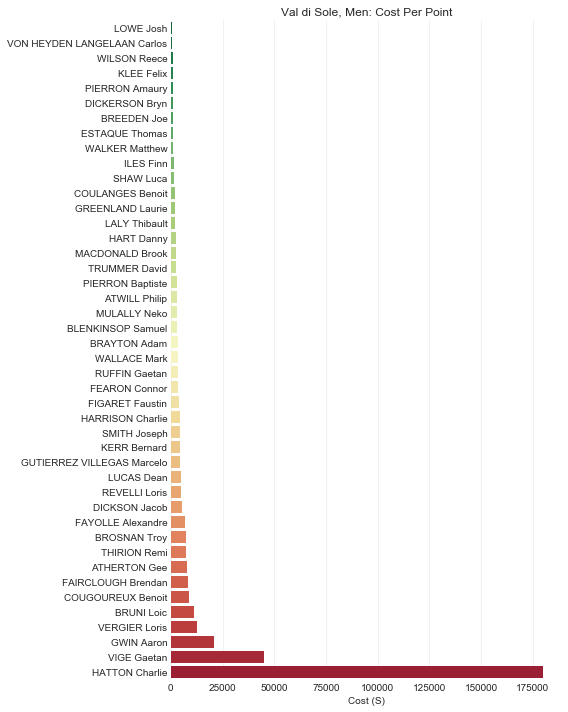

In [30]:
cnt = len( dfl[dfl.points > 0] )

dfl['dpp'] = dfl['cost']/dfl['points']
data = dfl.sort_values( 'dpp', ascending=True )
display( data.head(1) )
plt.figure(figsize=(8,10 if 'm' == gender else 5))
plot = sns.barplot( data['dpp'][:cnt], data['name_x'][:cnt], palette='RdYlGn_r' ) #, palette=colors )

sns.despine()
plot.set_frame_on(False)
plt.grid( True, which='major', axis='x', color='#EEEEEE' )
plot.set( title=chart_title_prefix + ': Cost Per Point', xlabel='Cost (S)', ylabel='' )

plt.tight_layout()

if image_gen:
    plt.savefig( file_prefix + '_cost_per_point.png', dpi=dpi )

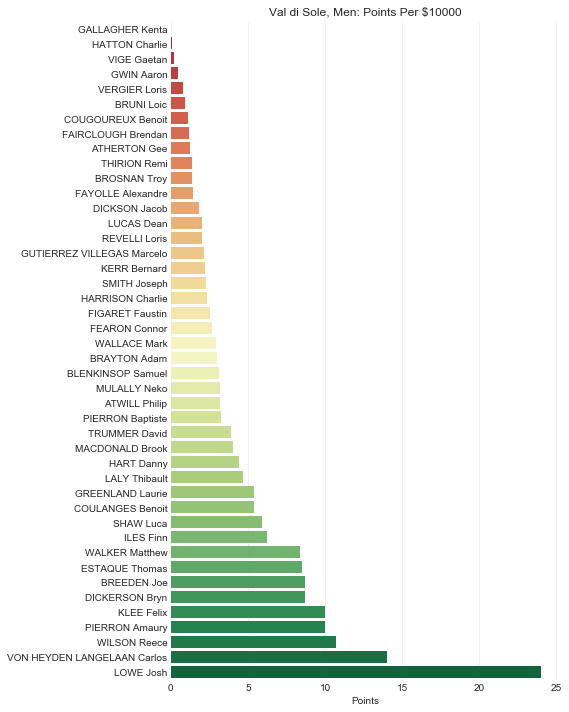

In [22]:
dfl['ppd'] = dfl['points'] / (dfl['cost']/10000)
data = dfl[:cnt].sort_values( 'ppd', ascending=True )

plt.figure(figsize=(8,10 if 'm' == gender else 4))
plot = sns.barplot( data['ppd'], data['name_x'], palette='RdYlGn' ) #, palette=colors )

sns.despine()
plot.set_frame_on(False)
plt.grid( True, which='major', axis='x', color='#EEEEEE' )
plot.set( title=chart_title_prefix + ': Points Per $10000', xlabel='Points', ylabel='' )
# plot.invert_xaxis()

plt.tight_layout()

if image_gen:
    plt.savefig( file_prefix + '_points_per_dollar.png', dpi=dpi )

In [35]:
dfx = df[['name', 'points', 'rank', 'WorldCupRank', 'UciRank', 'start_rev','q_rank']].copy().dropna()
dfx['UciPerf'] = round( dfx['UciRank'] / dfx['points'], 2 )
dfx['UciRankPerf'] = round( dfx['UciRank'] / dfx['rank'], 2 )
dfx['RacePerf'] = dfx['start_rev'] / dfx['points']
dfx['RaceRankPerf'] = dfx['start_rev'] / dfx['rank']
dfx['WcRankPerf'] = dfx['WorldCupRank'] / dfx['rank']
# dfx['dpp'] = round( dfx['cost']/dfx['points'], 2 )
# dfx['ppd'] = round( dfx['points'] / (dfx['cost']/10000), 2 )

In [36]:
dfx.sort_values( 'UciRankPerf', ascending=False ).head()

,name,points,rank,WorldCupRank,UciRank,start_rev,q_rank,UciPerf,UciRankPerf,RacePerf,RaceRankPerf,WcRankPerf
4,ESTAQUE Thomas,128.0,5.0,39,176,22.0,7,1.38,35.20,0.171875,4.400000,7.8
21,FRIXTALON Hugo,69.0,22.0,0,342,20.0,3,4.96,15.55,0.289855,0.909091,0.0
53,VON HEYDEN LANGELAAN Carlos,7.0,54.0,0,631,42.0,35,90.14,11.69,6.000000,0.777778,0.0
48,LOWE Josh,12.0,49.0,0,520,59.0,52,43.33,10.61,4.916667,1.204082,0.0
43,CHATANAY Valentin,17.0,44.0,0,453,52.0,45,26.65,10.30,3.058824,1.181818,0.0


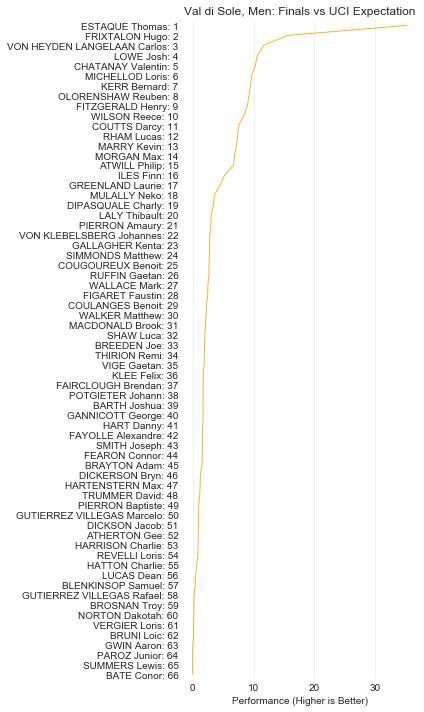

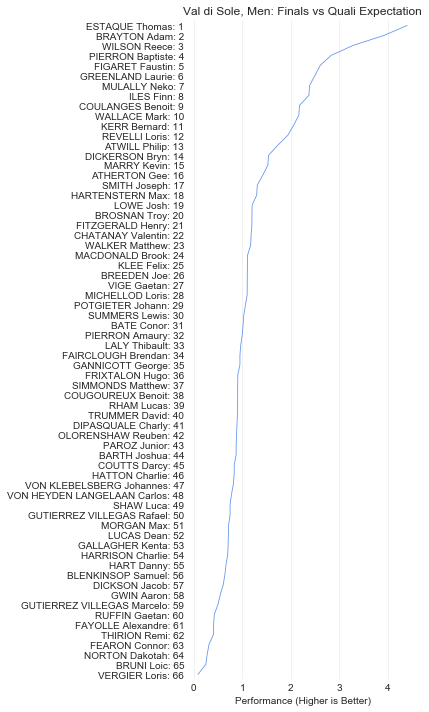

In [43]:
# labs = [ 'Rank vs UCI Ranking', 'Rank vs Qualifying' ]
tits = [ 'UCI', 'Quali' ]
for idx, col in enumerate( [ 'UciRankPerf', 'RaceRankPerf' ] ):
    data = dfx.sort_values( col, ascending=False ).reset_index( drop=True )

#     if idx == 1:
#         # Prefix: str(i+1) + ' ' +
#         ylabels = [ name + ' (' + str(data['UciRank'][i]) + ':' + str(data['rank'][i])[:-2] + ')' for i, name in enumerate( data['name'] ) ]
#     else:
#         ylabels = [ name + ' (' + str(data['q_rank'][i]) + ':' + str(data['rank'][i])[:-2] + ')' for i, name in enumerate( data['name'] ) ]
    ylabels = [ name + ': ' + str(i+1) for i, name in enumerate( data['name'] ) ]

    cols = [ 'orange', 'cornflowerblue', 'green', 'red' ]

    plt.figure(figsize=(6,10 if 'm' == gender else 4))
    plot = sns.pointplot( data[col], data['name'], scale=0.3, color=cols[idx], markers='' )

#     leg1 = mlines.Line2D( [], [], color=cols[0], marker='', markersize=10, label=labs[idx], linestyle='-' )
#     leg2 = mlines.Line2D( [], [], color=cols[1], marker='', markersize=10, label=labs[idx], linestyle='-' )
#     plt.legend( handles=[leg1, leg2] )

    sns.despine()
    plot.set_frame_on(False)
    plt.grid( True, which='major', axis='x', color='#EEEEEE' )
    plot.set( title=chart_title_prefix + ': Finals vs ' + tits[idx] + ' Expectation', xlabel='Performance (Higher is Better)', ylabel='' )
    plot.set_yticklabels( ylabels )
    # plot.set(xscale="log")

    plt.tight_layout()

    if image_gen:
        plt.savefig( file_prefix + '_' + tits[idx].lower() + '_finals_performance.png', dpi=dpi )

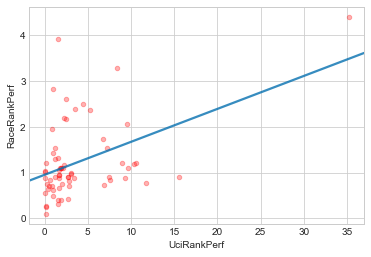

In [26]:
plot1 = sns.regplot( data['UciRankPerf'], data['RaceRankPerf'], marker='o', ci=None, line_kws={'color': '#0570b0', "alpha": 0.8}, scatter_kws={"s": 20, "alpha": 0.3, "color": "red"} ) #, fit_reg=False
# plot2 = sns.regplot( data['start_rev'], data['rank'], marker='*' )
# plt.ylim( 0, 61 )
# plot1.invert_xaxis()
# plot1.invert_yaxis()
# plot1.set(yscale="log")
